In [10]:
# import packages
import geopandas as gpd
import os
from requests import get
from urllib.parse import urlparse
import pandas as pd

In [11]:
def cache_data(src:str, dest:str) -> str:
    """
    Downloads a file from the given URL `src` and saves it to the `dest` directory.
    If the file already exists and is of sufficient size, skips the download.
    
    Args:
        src (str): The source URL of the file to be downloaded.
        dest (str): The destination directory where the file will be saved.
        
    Returns:
        str: The full path to the downloaded (or existing) file.
    """    
    url = urlparse(src) # We assume that this is some kind of valid URL 
    fn  = os.path.split(url.path)[-1] # Extract the filename
    dfn = os.path.join(dest,fn) # Destination filename
    
    if not os.path.isfile(dfn) or os.path.getsize(dfn) < 250:
        
        print(f"{dfn} not found, downloading!")

        path = os.path.split(dest)
        
        if len(path) >= 1 and path[0] != '':
            os.makedirs(os.path.join(*path), exist_ok=True)
            
        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)
            
        print("\tDone downloading...")

    else:
        print(f"Found {dfn} locally!")

    return dfn

In [13]:
# listing data,choose the data of 2024
ymd  = '20240614'
city = 'London'
host = 'https://orca.casa.ucl.ac.uk'
list_url  = f'{host}/~jreades/data/{ymd}-{city}-listings.parquet'
transport_url = 'https://github.com/Chocolateyz/Chocolate/raw/refs/heads/main/Transport_Classification_of_Londoners_(TCoL)/Transport_Classification_of_Londoners_(TCoL).shp'
inequity_url = 'https://github.com/Chocolateyz/Chocolate/raw/refs/heads/main/Borough_pages_data_UPDATE_9_2024_HACTAR(1).csv'
pop_url = 'https://github.com/Chocolateyz/Chocolate/raw/refs/heads/main/population%20by%20borough.xlsx'
sta_url = 'https://github.com/Chocolateyz/Chocolate/raw/refs/heads/main/London%20stations/London%20stations.shp'
line_url = 'https://github.com/Chocolateyz/Chocolate/raw/refs/heads/main/London%20Train%20Lines/London%20Train%20Lines.shp'
borough_url = 'https://github.com/Chocolateyz/Chocolate/raw/refs/heads/main/Boroughs.gpkg'

In [14]:
# the data frame of datas
listing_df = pd.read_parquet(cache_data(list_url, os.path.join('data','raw')))
# inequity data
inequity = pd.read_csv(cache_data(inequity_url, os.path.join('data','raw')),skiprows=11, header=0)
# population data
pop = pd.read_excel(cache_data(pop_url, os.path.join('data','raw')))
# borough outline
borough = gpd.read_file(cache_data(borough_url, os.path.join('data','raw')))

# station point data
station = gpd.read_file(sta_url)
# train line data
line = gpd.read_file(line_url)
# transport data, spatial unit is OA(output area)
transport = gpd.read_file(transport_url)

Found data/raw/20240614-London-listings.parquet locally!
Found data/raw/Borough_pages_data_UPDATE_9_2024_HACTAR(1).csv locally!
Found data/raw/population%20by%20borough.xlsx locally!
Found data/raw/Boroughs.gpkg locally!


In [15]:
# this is the columns list, if you want to focus on a certain topic, choose some of them
# listing data
columns_list = listing_df.columns.to_list()
print(f'listing data columns: {columns_list}')
print(f"Data frame is {listing_df.shape[0]:,} x {listing_df.shape[1]}")
# transport data
columns_transport = transport.columns.to_list()
print(f'transport data columns: {columns_transport}')
# inequity data
columns_inequity = inequity.columns.to_list()
print(f'inequity data columns: {columns_inequity}')
# population data
columns_pop = pop.columns.to_list()
print(f'population data columns: {columns_pop}')
# station data
columns_station = station.columns.to_list()
print(f'station data columns: {columns_station}')
# line data
columns_line = line.columns.to_list()
print(f'line data columns: {columns_line}')
# borough outline
columns_borough = borough.columns.to_list()
print(f'borough data columns: {columns_borough}')

listing data columns: ['id', 'listing_url', 'last_scraped', 'name', 'description', 'host_id', 'host_name', 'host_since', 'host_location', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'reviews_per_month']
Data frame is 85,127 x 31
transport data columns: ['OBJECTID', 'TCOL_SEGME', 'TCOL_SEG_1', 'OA_POPULAT', 'SEGMENT_PO', 'LOAC_SUPER', 'LOAC_GROUP', 'LOAC_SUB_G', 'LOCAL_AUTH', 'PROPENSITY', 'PROPENSI_1', 'PROPENSI_2', 'PROPENSI_3', 'CAR_DRIVER', 'CAR_PASSEN', 'BUS_TRIPS_', 'TRAIN_TRIP', 'RIVER_TRIP', 'TRAM_TRIPS', 'TUBE_TRIPS', 'BICYCLE_TR', 'HIRE_BIKE_', 'DLR_TRIPS_', 'POWERED_TW', 'TAXI_PHV_T', 'WALK_TRIPS', 'CAR_AVAILA', 'AVERAGE_IN', 'STUDENT', 'NO_CHILDRE', 'NO_CHILD_1', 'NO

In [45]:
listing_df.head()

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_is_superhost,...,amenities,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,reviews_per_month
0,92644,https://www.airbnb.com/rooms/92644,2023-09-06,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,<b>The space</b><br />Hi everyone! I have 2 ro...,498201,Dee Dee,2011-04-10,"London, United Kingdom",False,...,"[""Heating"", ""TV with standard cable"", ""Wifi"", ...",42.0,2,730,217,216.0,2011-06-21,2022-10-29,4.57,1.45
1,93015,https://www.airbnb.com/rooms/93015,2023-09-06,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,Gorgeous 2 bed ground floor apartment with per...,499704,Sarah,2011-04-11,"London, United Kingdom",False,...,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",175.0,5,240,40,38.0,2012-02-01,2022-09-30,4.82,0.27
2,13913,https://www.airbnb.com/rooms/13913,2023-09-06,Rental unit in Islington · ★4.80 · 1 bedroom ·...,My bright double bedroom with a large window h...,54730,Alina,2009-11-16,"London, United Kingdom",False,...,"[""Bathtub"", ""Hot water kettle"", ""Laundromat ne...",79.0,1,29,360,41.0,2010-08-18,2022-12-11,4.80,0.26
3,15400,https://www.airbnb.com/rooms/15400,2023-09-06,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,Lots of windows and light. St Luke's Gardens ...,60302,Philippa,2009-12-05,"Royal Borough of Kensington and Chelsea, Unite...",False,...,"[""Shampoo"", ""Luggage dropoff allowed"", ""Dryer""...",150.0,7,30,73,94.0,2009-12-21,2023-05-01,4.80,0.56
4,93734,https://www.airbnb.com/rooms/93734,2023-09-07,Condo in London · ★4.62 · 1 bedroom · 1 bed · ...,<b>During your stay</b><br />I’m a professiona...,497514,William,2011-04-10,"London, United Kingdom",True,...,"[""Window guards"", ""Bathtub"", ""Hot water kettle...",46.0,4,365,196,180.0,2011-06-30,2023-09-02,4.62,1.21


In [61]:
# what can be needed in listing
airbnb_cols = [
    'id', 'host_since', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
    'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'price',
    'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews'
]

airbnb_df = listing_df[airbnb_cols].copy()


In [64]:
# price all NaN to '0' then str
airbnb_df['price'] = airbnb_df['price'].fillna('0').astype(str)
# price float
airbnb_df['price'] = airbnb_df['price'].str.replace('£', '').str.replace(',', '').astype(float)

# host since date
airbnb_df['host_since'] = pd.to_datetime(airbnb_df['host_since'], errors='coerce')

# superhost
airbnb_df['host_is_superhost'] = listing_df['host_is_superhost']

# delete NaN
airbnb_df.dropna(subset=['price', 'latitude', 'longitude', 'host_since'], inplace=True)

# NaN to 0
airbnb_df.loc[:, 'host_listings_count'] = airbnb_df['host_listings_count'].fillna(0)
airbnb_df.loc[:, 'host_total_listings_count'] = airbnb_df['host_total_listings_count'].fillna(0)
airbnb_df.loc[:, 'number_of_reviews'] = airbnb_df['number_of_reviews'].fillna(0)

print(airbnb_df.isnull().sum())


id                           0
host_since                   0
host_is_superhost            0
host_listings_count          0
host_total_listings_count    0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
price                        0
minimum_nights               0
maximum_nights               0
availability_365             0
number_of_reviews            0
dtype: int64


In [66]:
print(airbnb_df.describe())

                 id                     host_since  host_listings_count  \
count  8.512700e+04                          85127         85127.000000   
mean   3.576011e+17  2017-01-30 15:42:02.795352832            49.239466   
min    1.391300e+04            2008-12-03 00:00:00             1.000000   
25%    2.201646e+07            2014-09-24 00:00:00             1.000000   
50%    4.943680e+07            2016-06-13 00:00:00             2.000000   
75%    8.130157e+17            2019-04-26 00:00:00             7.000000   
max    9.738958e+17            2023-09-04 00:00:00          3023.000000   
std    4.111131e+17                            NaN           294.724362   

       host_total_listings_count      latitude     longitude  accommodates  \
count               85127.000000  85127.000000  85127.000000  85127.000000   
mean                   86.721874     51.509428     -0.128178      3.201475   
min                     1.000000     51.295937     -0.497800      1.000000   
25%         

In [67]:
# Superhost Ratio
superhost_ratio = airbnb_df['host_is_superhost'].value_counts(normalize=True)
print("Superhost Ratio:\n", superhost_ratio)

Superhost Ratio:
 host_is_superhost
False    0.834248
True     0.165752
Name: proportion, dtype: float64


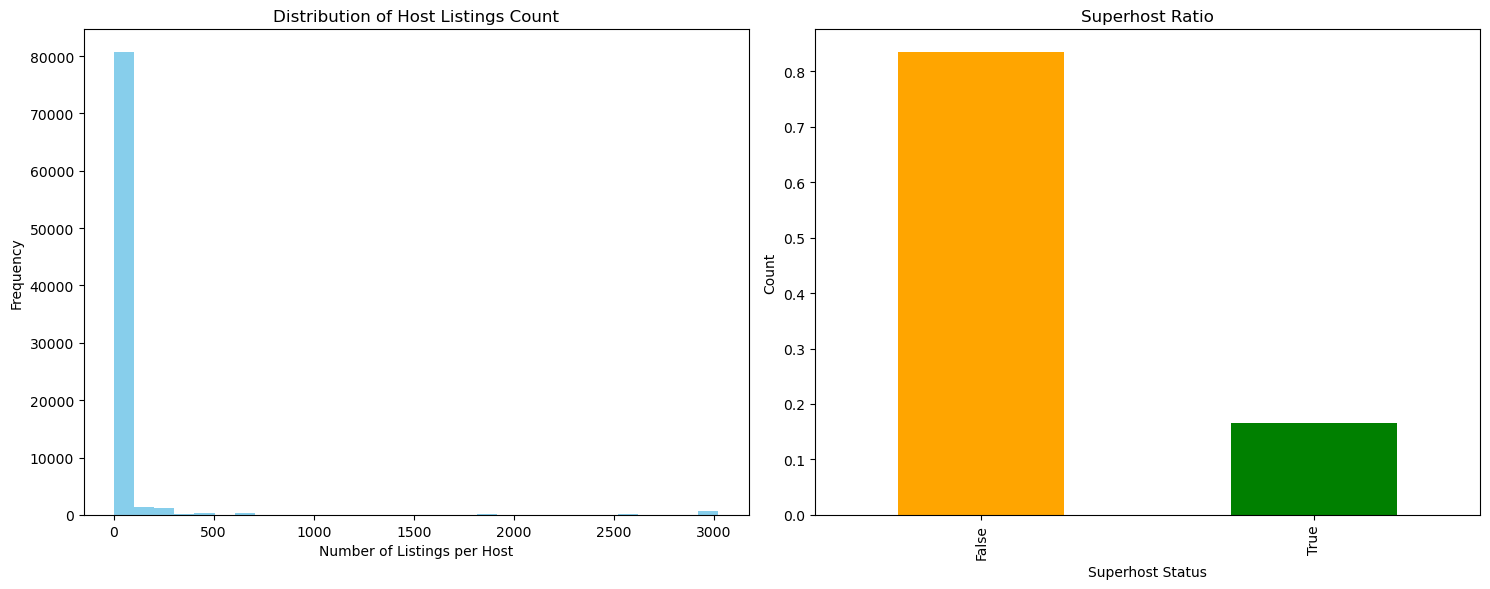

In [143]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Listings per Host
airbnb_df['host_listings_count'].plot(kind='hist', bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Host Listings Count')
axes[0].set_xlabel('Number of Listings per Host')
axes[0].set_ylabel('Frequency')

# Superhost Ratio
superhost_ratio.plot(kind='bar', ax=axes[1], color=['orange', 'green'])
axes[1].set_title('Superhost Ratio')
axes[1].set_xlabel('Superhost Status')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

property_type
Entire rental unit             33450
Private room in rental unit    13278
Private room in home            9795
Entire condo                    8656
Entire home                     7530
                               ...  
Island                             1
Earthen home                       1
Dome                               1
Castle                             1
Yurt                               1
Name: count, Length: 99, dtype: int64
room_type
Entire home/apt    54203
Private room       30366
Shared room          340
Hotel room           218
Name: count, dtype: int64


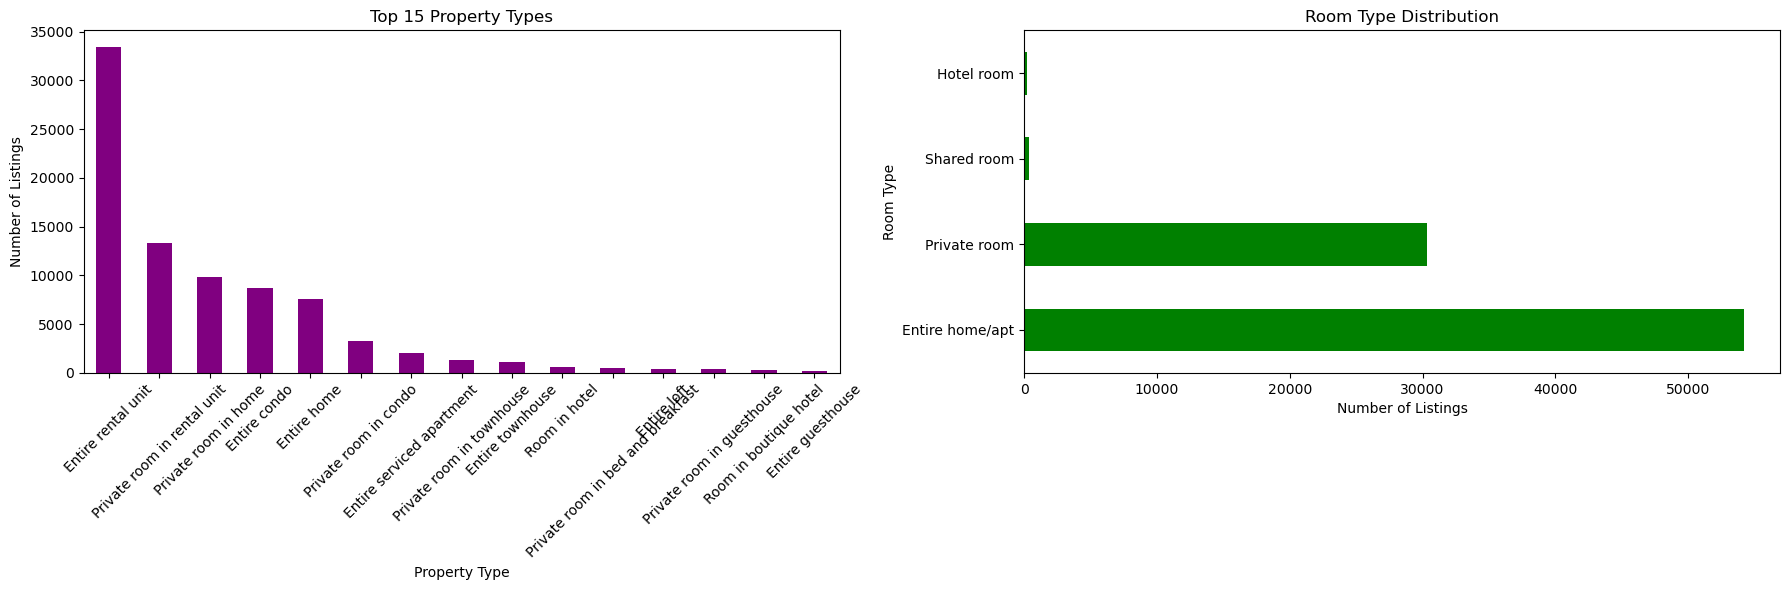

In [145]:
# property type counts
property_counts = airbnb_df['property_type'].value_counts()
print(property_counts)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# visualize first 15s
airbnb_df['property_type'].value_counts().head(15).plot(kind='bar', ax=axes[0], color='purple')
axes[0].set_title('Top 15 Property Types')
axes[0].set_xlabel('Property Type')
axes[0].set_ylabel('Number of Listings')
axes[0].tick_params(axis='x', rotation=45)

# room type
room_type_counts = airbnb_df['room_type'].value_counts()
print(room_type_counts)
airbnb_df['room_type'].value_counts().plot(kind='barh', ax=axes[1], color='green')
axes[1].set_title('Room Type Distribution')
axes[1].set_xlabel('Number of Listings')
axes[1].set_ylabel('Room Type')

plt.tight_layout()
plt.show()

Minimum Nights Stats:
 count    85127.000000
mean         5.492946
std         22.872656
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       1125.000000
Name: minimum_nights, dtype: float64
Maximum Nights Stats:
 count    8.512700e+04
mean     6.919066e+03
std      1.799485e+06
min      1.000000e+00
25%      6.000000e+01
50%      3.650000e+02
75%      1.125000e+03
max      5.248556e+08
Name: maximum_nights, dtype: float64


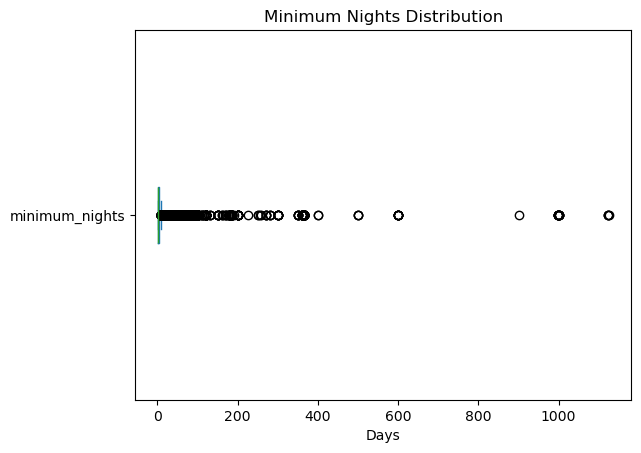

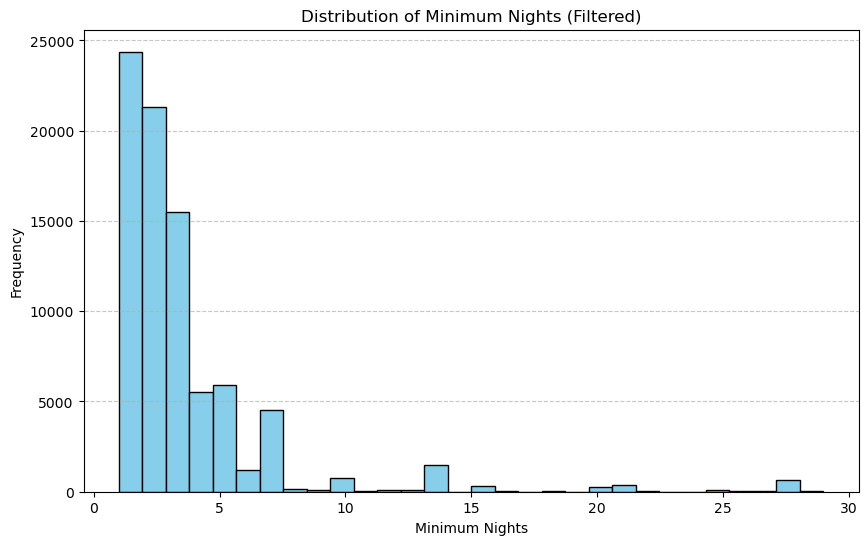

In [88]:
# Minimum & Maximum Nights
print("Minimum Nights Stats:\n", airbnb_df['minimum_nights'].describe())
print("Maximum Nights Stats:\n", airbnb_df['maximum_nights'].describe())
# box plot
airbnb_df['minimum_nights'].plot(kind='box', vert=False, title='Minimum Nights Distribution')
plt.xlabel('Days')
plt.show()
# add <30 days
filtered_min_nights = airbnb_df[airbnb_df['minimum_nights'] < 30]
plt.figure(figsize=(10, 6))
filtered_min_nights['minimum_nights'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Minimum Nights (Filtered)')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Price Stats:
 count    85127.000000
mean       183.626347
std        490.301996
min          0.000000
25%         65.000000
50%        112.000000
75%        196.000000
max      80100.000000
Name: price, dtype: float64


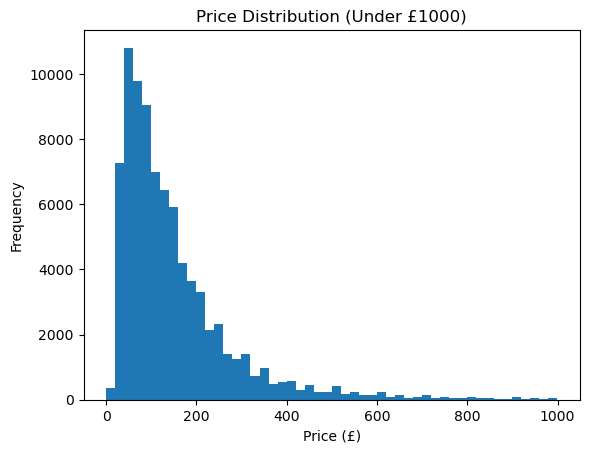

In [140]:
# Price
print("Price Stats:\n", airbnb_df['price'].describe())
# Under 500
airbnb_df[airbnb_df['price'] < 1000]['price'].plot(kind='hist', bins=50, title='Price Distribution (Under £1000)')
plt.xlabel('Price (£)')
plt.show()

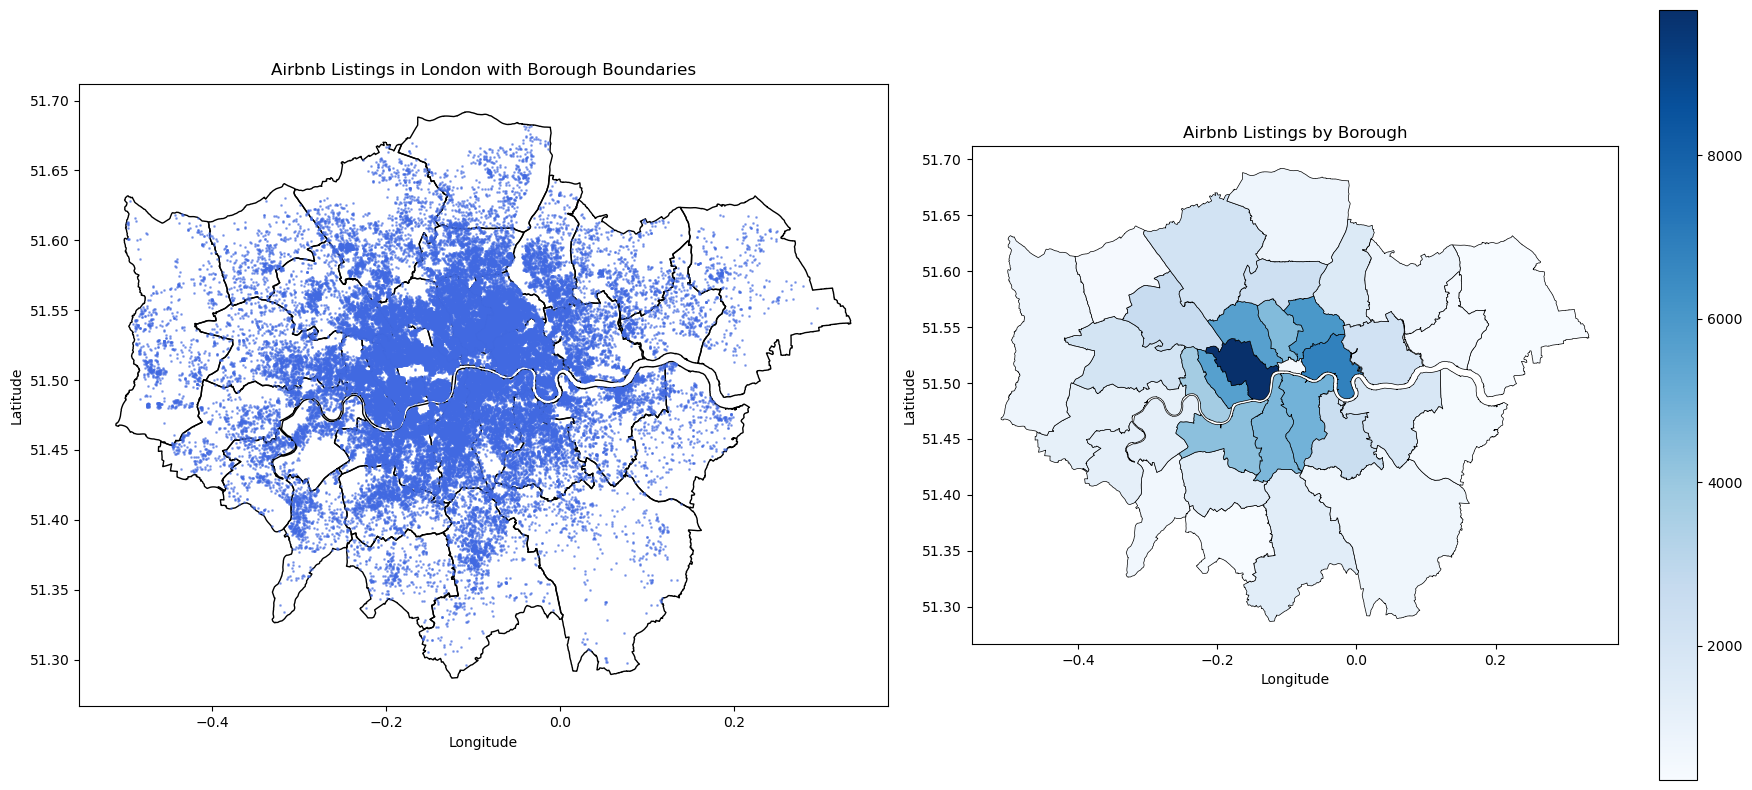

In [147]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Airbnb Listing
borough.plot(ax=axes[0], edgecolor='black', facecolor='none', linewidth=1)
airbnb_gdf.plot(ax=axes[0], markersize=1, alpha=0.5, color='royalblue')
axes[0].set_title('Airbnb Listings in London with Borough Boundaries')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

# Airbnb with borough
borough_final.plot(column='total_listings', cmap='Blues', legend=True, linewidth=0.5, edgecolor='black', ax=axes[1])
axes[1].set_title('Airbnb Listings by Borough')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')

plt.tight_layout()
plt.show()

count        33.000000
mean     283241.810437
std       82035.846678
min        8503.050827
25%      242315.616129
50%      289491.503703
75%      333006.170079
max      419517.213165
Name: POPULATION, dtype: float64


<Figure size 1200x1000 with 0 Axes>

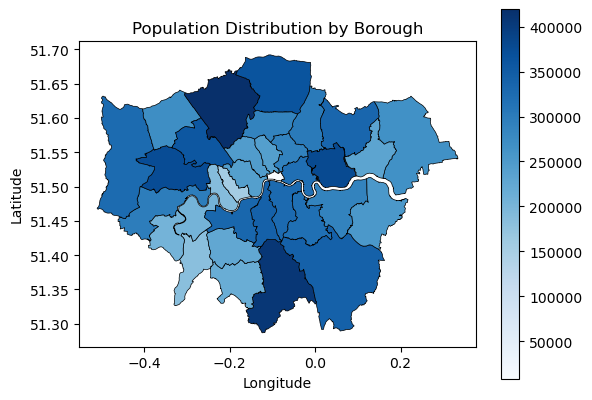

In [115]:
# population
print(borough_final['POPULATION'].describe())
plt.figure(figsize=(12, 10))
borough_final.plot(column='POPULATION', cmap='Blues', legend=True, linewidth=0.5, edgecolor='black')
plt.title('Population Distribution by Borough')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [117]:
# inequity
inequity_columns = [
    'Poverty rate', 
    'Child poverty rate (AHC)', 
    'Income deprivation (relative to London overall)', 
    'Unemployment rate'
]
print(borough_final[inequity_columns].describe())

       Poverty rate  Child poverty rate (AHC)  \
count     29.000000                 29.000000   
mean      26.241379                 31.724138   
std        7.785771                  7.731644   
min       12.000000                 12.000000   
25%       21.000000                 28.000000   
50%       25.000000                 31.000000   
75%       30.000000                 37.000000   
max       43.000000                 48.000000   

       Income deprivation (relative to London overall)  Unemployment rate  
count                                        30.000000          29.000000  
mean                                          1.044333           5.044828  
std                                           0.405290           0.766526  
min                                           0.420000           4.100000  
25%                                           0.717500           4.500000  
50%                                           0.980000           4.900000  
75%                       

<Figure size 1200x1000 with 0 Axes>

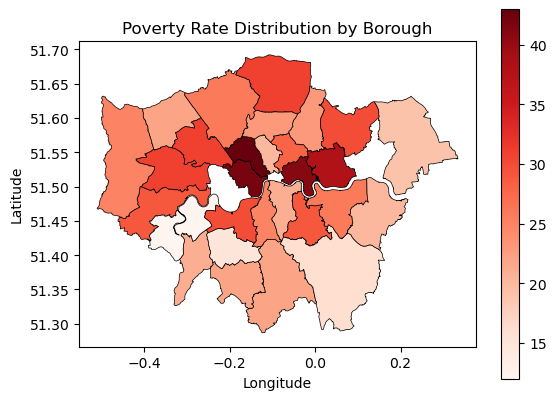

<Figure size 1200x1000 with 0 Axes>

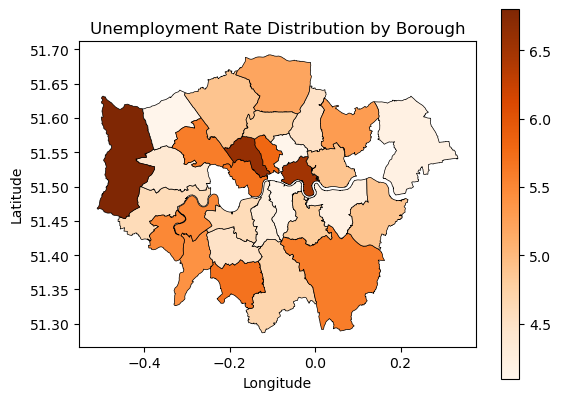

In [119]:
plt.figure(figsize=(12, 10))
# Poverty
borough_final.plot(column='Poverty rate', cmap='Reds', legend=True, linewidth=0.5, edgecolor='black')
plt.title('Poverty Rate Distribution by Borough')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
plt.figure(figsize=(12, 10))
# Unemployment
borough_final.plot(column='Unemployment rate', cmap='Oranges', legend=True, linewidth=0.5, edgecolor='black')
plt.title('Unemployment Rate Distribution by Borough')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()